In [1]:
# @title Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots
import geopandas as gpd
import seaborn as sns
from matplotlib.patches import Patch
import math
import joblib

import warnings
warnings.filterwarnings('ignore')


##  Supervised Learning

### Apply to country Nigeria

#### Load Data

In [3]:
#@title Apply to country of Nigeria
# Read in features 
df = gpd.read_file('nga_sample_supervised.geojson')
labels = pd.read_csv('appliance_labels.csv')
#@title Load in Labels

#labels = pd.read_csv('appliance_labels.csv')

labels_t = labels.pivot_table(index='hhid', columns='appliance', values='n_owned').reset_index()

APPLIANCES = labels['appliance'].unique().tolist()
train_fts = pd.Index( ['tot_population', 'med_temperature', 'med_precipitation', 'med_awi',
       'med_spending', 'BUI_percentile_5', 'BUI_percentile_25', 'BUI_median',
       'BUI_percentile_75', 'BUI_percentile_95', 'BUI_mean', 'BUI_prop',
       'built_up_area', 'urca_12', 'urca_9', 'urca_7', 'urca_10', 'urca_2',
       'urca_5', 'urca_11', 'urca_3', 'urca_4', 'urca_13', 'urca_6', 'urca_16',
       'urca_17', 'urca_19', 'urca_18', 'electrification_prop_01',
       'electrification_prop_02', 'electrification_prop_03',
       'electrification_prop_04', 'electrification_prop_05',
       'electrification_prop_06', 'electrification_prop_07',
       'electrification_prop_08', 'electrification_prop_09',
       'electrification_prop_10', 'electrification_prop_11',
       'electrification_prop_12'])
model_rf =  joblib.load('model_rf_pc0.pkl')
model_rf_1 =  joblib.load('model_rf_pc1.pkl')

df['pc0'] = model_rf.predict(df[train_fts])
df['pc1'] = model_rf_1.predict(df[train_fts])


app_to_model =  joblib.load('linear_models_by_app.pkl')

# Loop through appliance models and make predictions
app_predictions = pd.DataFrame()
for app, model in app_to_model.items():
    # Make predictions using new data
    predictions = model.predict(df[['pc0', 'pc1']])  # new_data should be a DataFrame
    df[app] = predictions


df = df[['shapeName'] + list(APPLIANCES)]
# print the output
df.head(5)

,shapeName,Fan,Laptop / Computer,Light bulb,Mobile phone charger,Radio,Television,Air cooler,Fridge,Washing machine,Air conditioner,Electric room heater,Electric water heater,Electric cooker,Rice cooker,Sewing machine,"Home mechanical appliances (e.g., Mixer, Blender)","Home thermal appliances (e.g., Kettle, Iron)"
0,Irepodun/Ifelodun,1.150300,0.092050,5.314972,1.711672,0.255917,0.503056,0.010776,0.330716,0.057229,0.071774,0.010357,0.055973,0.040038,0.026847,0.024103,0.098549,0.281824
1,Mokwa,4.767427,-0.157365,12.406508,5.929200,1.097289,1.985768,-0.046795,0.637180,-0.231839,-0.227768,-0.054712,-0.126313,-0.007068,-0.122852,0.080706,0.097728,0.581308
2,Ojo,2.029873,0.089895,7.049127,2.650326,0.434701,0.877466,0.003668,0.443109,0.027867,0.044843,0.002783,0.044249,0.043903,0.009998,0.042164,0.138265,0.386834
3,Gudu,4.339016,-0.232405,11.549221,5.585077,1.043785,1.785375,-0.052297,0.533176,-0.270781,-0.274367,-0.061753,-0.163012,-0.028878,-0.140081,0.066320,0.026460,0.488294
4,Illela,3.946292,-0.253665,10.771240,5.198994,0.973765,1.612937,-0.051741,0.468607,-0.273221,-0.279783,-0.061505,-0.170164,-0.036424,-0.139986,0.056624,-0.006438,0.429181


In [4]:
# Expansion

lga_num_hh = pd.read_csv('lga_num_hh.csv')

df_hh = df.merge(lga_num_hh, on='shapeName')

df_hh[APPLIANCES] = df_hh[APPLIANCES].multiply(df_hh['num_hh'], axis=0).round()

method1 = df_hh.copy()
#print
method1.head(5)

,shapeName,Fan,Laptop / Computer,Light bulb,Mobile phone charger,Radio,Television,Air cooler,Fridge,Washing machine,Air conditioner,Electric room heater,Electric water heater,Electric cooker,Rice cooker,Sewing machine,"Home mechanical appliances (e.g., Mixer, Blender)","Home thermal appliances (e.g., Kettle, Iron)",num_hh
0,Irepodun/Ifelodun,47729.0,3819.0,220534.0,71022.0,10619.0,20873.0,447.0,13722.0,2375.0,2978.0,430.0,2322.0,1661.0,1114.0,1000.0,4089.0,11694.0,41493.0
1,Mokwa,607017.0,-20037.0,1579671.0,754941.0,139713.0,252840.0,-5958.0,81130.0,-29519.0,-29001.0,-6966.0,-16083.0,-900.0,-15642.0,10276.0,12443.0,74016.0,127326.0
2,Ojo,484271.0,21446.0,1681724.0,632294.0,103707.0,209339.0,875.0,105713.0,6648.0,10698.0,664.0,10557.0,10474.0,2385.0,10059.0,32986.0,92288.0,238572.0
3,Gudu,113877.0,-6099.0,303109.0,146580.0,27394.0,46857.0,-1373.0,13993.0,-7107.0,-7201.0,-1621.0,-4278.0,-758.0,-3676.0,1741.0,694.0,12815.0,26245.0
4,Illela,277259.0,-17822.0,756766.0,365271.0,68415.0,113322.0,-3635.0,32923.0,-19196.0,-19657.0,-4321.0,-11955.0,-2559.0,-9835.0,3978.0,-452.0,30153.0,70258.0


# Unsupervised Learning Method

## Load Data

In [5]:
# 
df = gpd.read_file("nigeria_reduced_features.geojson")
print("1. Scaling Appliance Dataset\n")
# load data_scaled model
data_scaled = joblib.load('data_scaled.pkl')
# Load the Scaler model
scaler = joblib.load('scaler_model.pkl')
data_scaled.head(1)

1. Scaling Appliance Dataset



,tot_population,med_temperature,med_precipitation,med_awi,med_spending,BUI_percentile_25,BUI_median,BUI_percentile_75,built_up_area,urban,periurban,rural,electrification_prop_mean
0,-0.904671,1.775,-0.727132,-0.760095,-0.364995,-0.156452,-0.303926,-0.63433,-0.62202,-0.514876,0.780763,-0.460944,-0.438819


In [6]:
def visualizing_results(pca_result, label, centroids_pca):
    """ Visualizing the clusters

    :param pca_result: PCA applied data
    :param label: K Means labels
    :param centroids_pca: PCA format K Means centroids
    """
    # ------------------ Using Matplotlib for plotting-----------------------
    x = pca_result[:, 0]
    y = pca_result[:, 1]

    scatter = plt.scatter(x, y, c=label, alpha=0.5, s=200)  # plot different colors per cluster

    for i, (cx, cy) in enumerate(centroids_pca):
        plt.text(cx, cy, f"{cx:.2f}, {cy:.2f}", fontsize=9, ha='left', va='center', color='white')


    plt.title('Household clusters')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')

    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, linewidths=1.5,
                color='red', edgecolors="black")#, lw=1.5)

    unique_labels = np.unique(label)
    colors = scatter.cmap(scatter.norm(unique_labels))
    legend_handles = [
        Patch(color=colors[i], label=f"{i}") for i in unique_labels
    ]
    plt.legend(handles=legend_handles, title="Clusters")
    plt.show()

# PCA

In [7]:
print("\n\n2. Reducing via PCA\n")
pca_2 = joblib.load('un_supervised_pca_model.pkl')
pca_result = joblib.load('pca_result.pkl')



2. Reducing via PCA



## Fitting KMeans



4. Visualizing the data


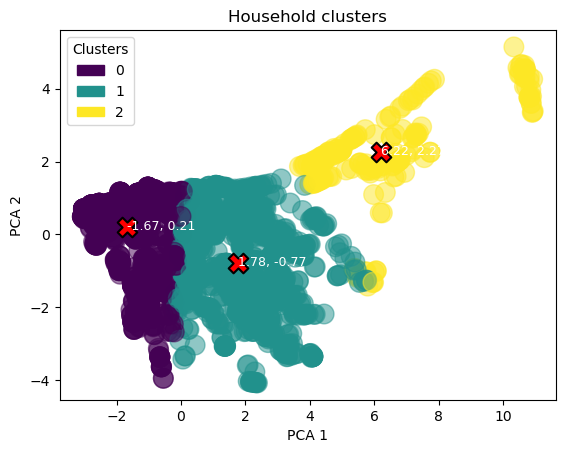

In [8]:
# Now visualize with labels_mapped
print("\n\n4. Visualizing the data")
# Load the model
kmeans = joblib.load('kmeans_model.pkl')
centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)
#Order the centroids to keep track of correspondence
order = np.argsort(centroids_pca[:, 0])
label_map = {old_label: new_label for new_label, old_label in enumerate(order)}

# Re-assign labels according to the sorted order
labels_mapped = np.vectorize(label_map.get)(kmeans.labels_)
visualizing_results(pca_result, labels_mapped, centroids_pca[order])

In [9]:
# Add labels to scaled data for visualization
drop_cols = ['hhid', 'geometry']
#labels_mapped = joblib.load('label_map.pkl')
X_scaled = scaler.fit_transform(df.drop(drop_cols, axis=1))

hh_w_labels = pd.DataFrame(X_scaled, columns=df.drop(drop_cols, axis=1).columns)
hh_w_labels['cluster'] = labels_mapped

cluster_profiles = hh_w_labels.groupby('cluster').median()


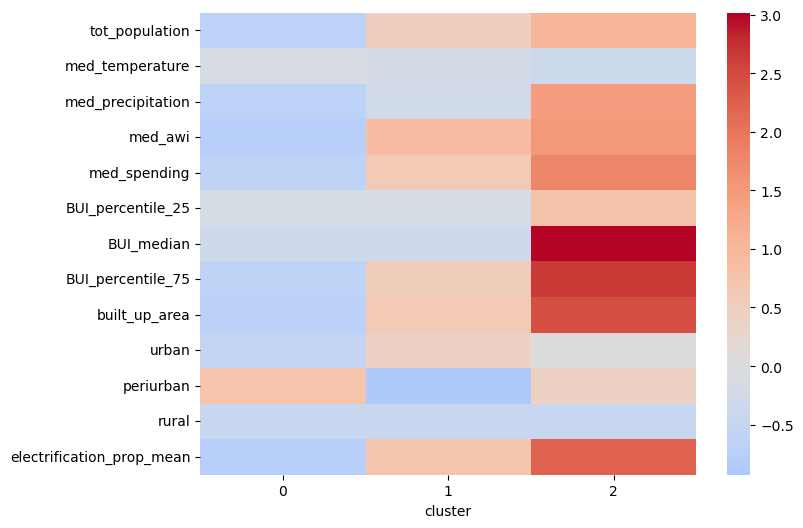

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(cluster_profiles.T, cmap="coolwarm", center=0)
plt.show()

In [11]:
for col in df[[col for col in df.columns if col.startswith('BUI')]].columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [12]:
# Add labels to unscaled data for interpretation

df['cluster'] = labels_mapped

display(df.drop(drop_cols, axis=1).groupby('cluster').median())
display(df.drop(drop_cols, axis=1).groupby('cluster').mean())
display(df.drop(drop_cols, axis=1).groupby('cluster').agg([min, max]))


,tot_population,med_temperature,med_precipitation,med_awi,med_spending,BUI_percentile_25,BUI_median,BUI_percentile_75,built_up_area,urban,periurban,rural,electrification_prop_mean
cluster,,,,,,,,,,,,,
0,12023.462891,299.959625,0.001927,0.273437,2.562880,0.000000,0.000000,0.000000,1.115577,0.000000,100.000000,0.0,0.098555
1,34175.214844,299.875641,0.003007,0.970410,3.409132,0.000000,0.000000,0.265247,4.100236,14.285714,66.666667,0.0,0.451638
2,44608.781250,299.699493,0.007304,1.218174,4.167683,0.043443,0.372112,0.741321,8.202426,7.142857,92.857143,0.0,0.803312


,tot_population,med_temperature,med_precipitation,med_awi,med_spending,BUI_percentile_25,BUI_median,BUI_percentile_75,built_up_area,urban,periurban,rural,electrification_prop_mean
cluster,,,,,,,,,,,,,
0,13932.259532,300.110971,0.002740,0.323398,2.567271,0.000000,0.000000,0.010309,1.250450,0.965296,92.752939,6.281765,0.117555
1,39329.836061,300.113474,0.004624,0.923443,3.441532,0.000573,0.024418,0.264995,4.119869,18.804523,70.671675,10.523801,0.454905
2,45536.895286,299.721212,0.006967,1.222866,4.323972,0.114740,0.420002,0.748631,8.528420,13.434482,86.288462,0.277056,0.814445


tot_population                med_temperature              \
                   min            max             min         max   
cluster                                                             
0          1292.328857   62836.621094      297.451508  302.596161   
1          8781.324219  123524.343750      298.294952  302.096527   
2         27377.597656   68492.171875      299.458130  300.159241   

        med_precipitation             med_awi           med_spending  \
                      min       max       min       max          min   
cluster                                                                
0                0.000865  0.009198 -0.194680  1.117770     1.548886   
1                0.001076  0.009720  0.201337  1.323969     2.452847   
2                0.001094  0.007608  1.118079  1.311753     3.638545   

                   ... built_up_area            urban             periurban  \
              max  ...           min        max   min        max        min   
cluster            ...                                                        
0        3.758595  ...      0.191283   3.872487   0.0  33.333333  30.769231   
1        5.951539  ...      1.633453   7.983010   0.0  66.666667  25.000000   
2        5.103525  ...      5.679713  11.579687   0.0  66.666667  33.333333   

               rural            electrification_prop_mean            
           max   min        max                       min       max  
cluster                                                              
0        100.0   0.0  69.230769                  0.000000  0.462667  
1        100.0   0.0  75.000000                  0.178527  0.852422  
2        100.0   0.0   7.142857                  0.659213  0.975503  

[3 rows x 26 columns]

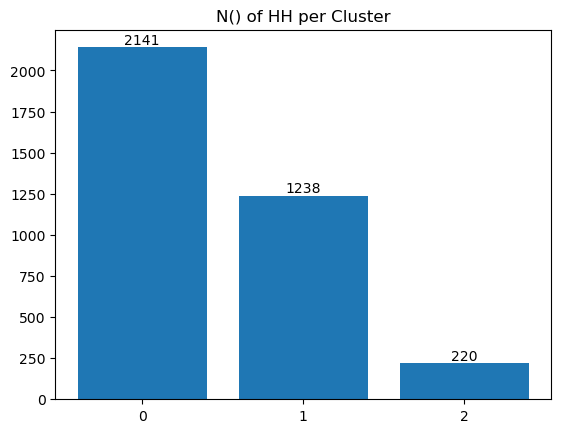

In [13]:
counts = df['cluster'].value_counts()

plt.bar(counts.index, counts.values)
plt.xticks(ticks=counts.index, labels=counts.index.astype(int))
plt.title('N() of HH per Cluster')
for i in range(3):
    plt.text(i, counts.values[i], str(counts.values[i]), ha='center', va='bottom')
plt.show()


### Map clusters

In [14]:
#Add appliances to df if not already included

df = df.merge(labels_t, on='hhid')
#df = df.merge(labels_t, on='shapeName')
hh_clusters = df.groupby('cluster')[APPLIANCES].mean().reset_index()

### Apply to country of Nigeria

In [15]:
# Map country wide feature PCA to cluster centroids
# Multiply with number of households
lga_features = gpd.read_file('nga_sample_unsupervised.geojson')

# Load the saved KMeans and label map models
kmeans = joblib.load('kmeans_model.pkl')

# Load the scaled data
data_scaled = joblib.load('data_scaled.pkl')

# Load the scaler model
scaler = joblib.load('scaler_model.pkl')
# Using predict() to assign clusters
lga_features['cluster'] = kmeans.predict(lga_features[data_scaled.columns.to_list()])
lga_cluster = lga_features[['shapeName', 'cluster']]

lga_num_hh = pd.read_csv('lga_num_hh.csv')
lga_hh_cluster = lga_cluster.merge(lga_num_hh, on='shapeName')

In [16]:
# Merge cluster key with main df
lga_hh_cluster_app = lga_hh_cluster.merge(hh_clusters, on='cluster')

APPLIANCES = hh_clusters.columns[1:]

#Multiply num_hh with each appliance count
lga_hh_cluster_app[APPLIANCES] = lga_hh_cluster_app[APPLIANCES].multiply(lga_hh_cluster_app['num_hh'], axis=0).round()

method2 = lga_hh_cluster_app.copy()

In [17]:

diff = method1.drop(columns=['shapeName', 'num_hh']) - method2.drop(columns=['shapeName', 'cluster', 'num_hh'])

diff['shapeName'] = method2['shapeName']


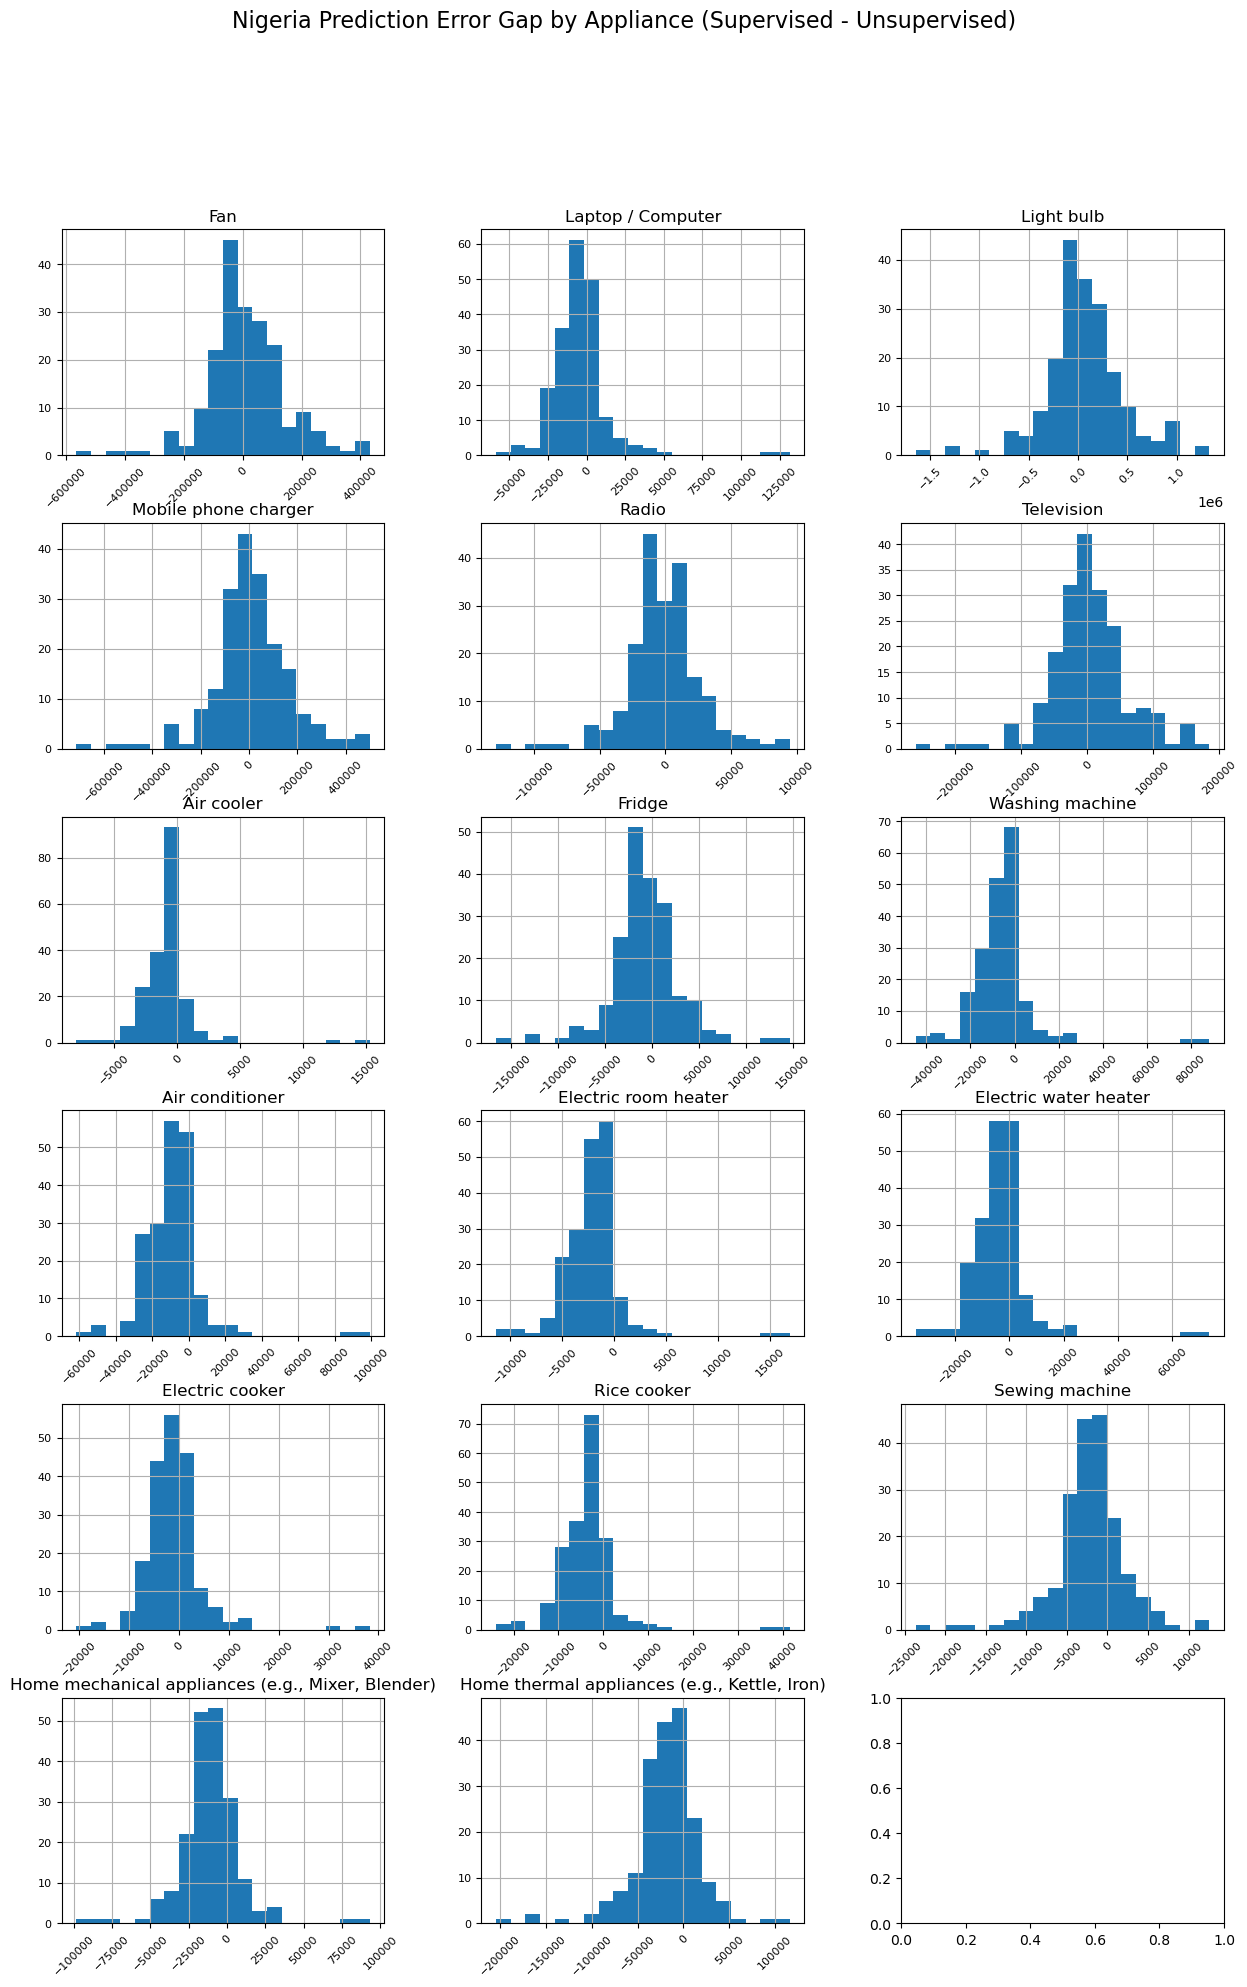

In [18]:

fig, axes = plt.subplots(6, 3, figsize=(15, 22))
axes = axes.flatten()

for i, app in enumerate(APPLIANCES):
    diff[[app]].hist(ax=axes[i], bins=20)
    axes[i].set_title(app)
    axes[i].tick_params(axis='x', labelrotation=45)
    axes[i].tick_params(axis='both', labelsize=8)

fig.suptitle("Nigeria Prediction Error Gap by Appliance (Supervised - Unsupervised)", fontsize=16)

plt.show()



In [19]:
#Correlation
correlations = {
    col: method1.drop(columns=['shapeName'])[col].corr(method2.drop(columns=['shapeName'])[col])
    for col in method1.drop(columns=['shapeName']).columns
}

cor_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['correlation'])

print(cor_df)



                                                   correlation
Fan                                                   0.077160
Laptop / Computer                                     0.074582
Light bulb                                            0.081145
Mobile phone charger                                  0.070134
Radio                                                 0.060043
Television                                            0.080653
Air cooler                                            0.056876
Fridge                                                0.090012
Washing machine                                       0.062037
Air conditioner                                       0.065478
Electric room heater                                  0.057034
Electric water heater                                 0.070205
Electric cooker                                       0.081203
Rice cooker                                           0.059018
Sewing machine                                        0